In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

df = pd.read_csv("/home/dang032003/data_visualization/homework/hw1/Homework_sampledata1.txt", sep='\s+', names=['Day', '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12'])
df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(columns=df.columns[0], axis=1,  inplace=True)

for col in df.columns:
    date_format = '%Y-%m'
    date=datetime.strptime(col, date_format)
    temp = df.iloc[0][col]
   
df1 = df.values.T.tolist()
daily_temp = np.ravel(df1)
daily_temp[daily_temp == -99] = np.nan
start_date = '2008-01-01'
end_date = '2008-12-31'
date_range = pd.date_range(start=start_date, end=end_date)
date_range_truncated = date_range[:len(daily_temp)]
daily_temp_truncated = daily_temp[:len(date_range)]


Task 1

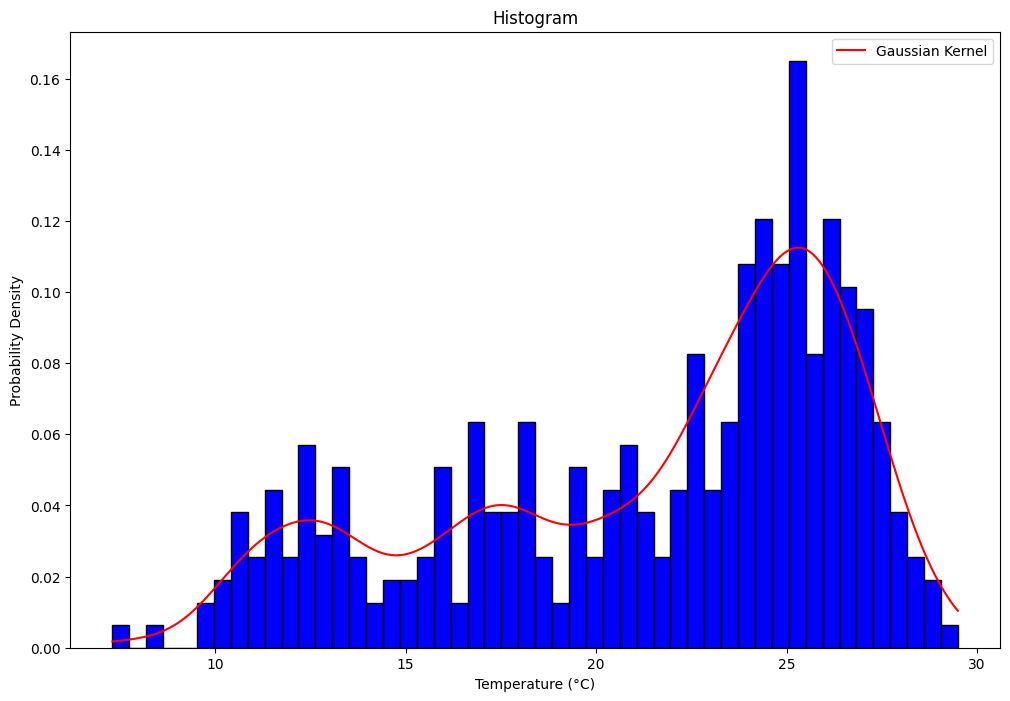

In [11]:
#Draw histogram from daily temperature data.
from sklearn.neighbors import KernelDensity
import numpy as np
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.hist(daily_temp_truncated, bins=50, color='blue', edgecolor='black', density=True)
ax.set_ylabel('Probability Density')
ax.set_xlabel('Temperature (°C)')


#Perform a KDE with kernel = gausian and threshold = 1
X = np.nan_to_num(daily_temp_truncated, nan=np.nanmedian(daily_temp_truncated))
threshold = 1
kde = KernelDensity(kernel='gaussian', bandwidth=1)
kde.fit(X.reshape(-1,1))


x_axis = np.linspace(min(X), max(X), 1000).reshape(-1,1)
log_dens = kde.score_samples(x_axis)
plt.plot(x_axis, np.exp(log_dens), color='red', label='Gaussian Kernel')


plt.legend()

plt.title(f"Histogram")
plt.show()


Task 2

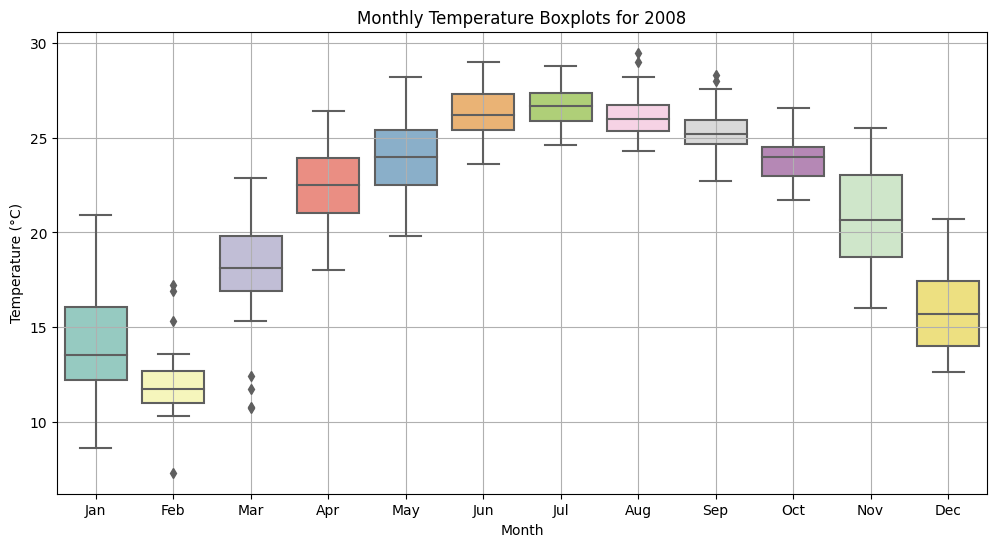

In [12]:
df2 = pd.DataFrame({'Date': date_range_truncated, 'Temperature': daily_temp_truncated})
df2['Month'] = df2['Date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature', data=df2, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Boxplots for 2008')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.show()

Task 3


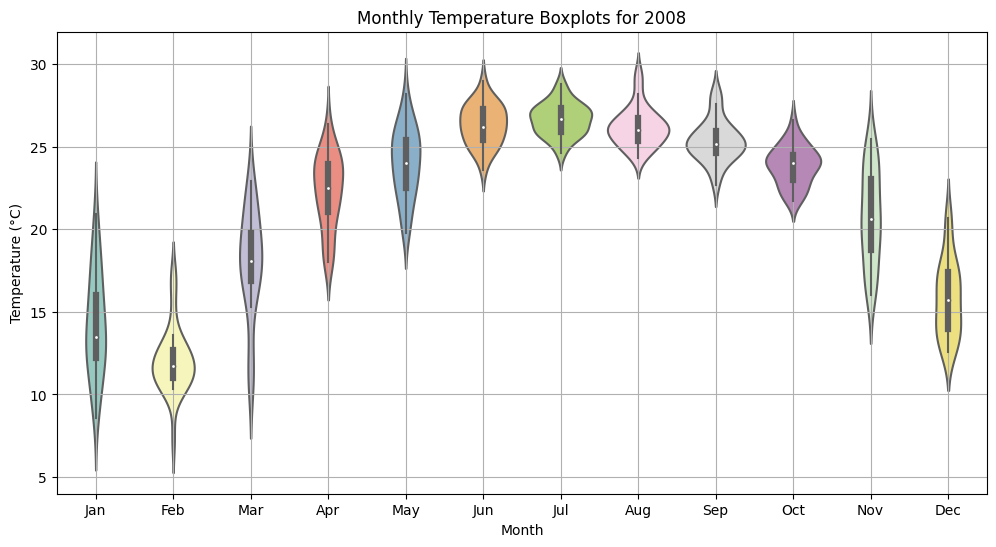

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Temperature', data=df2, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Boxplots for 2008')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.show()

Task 4

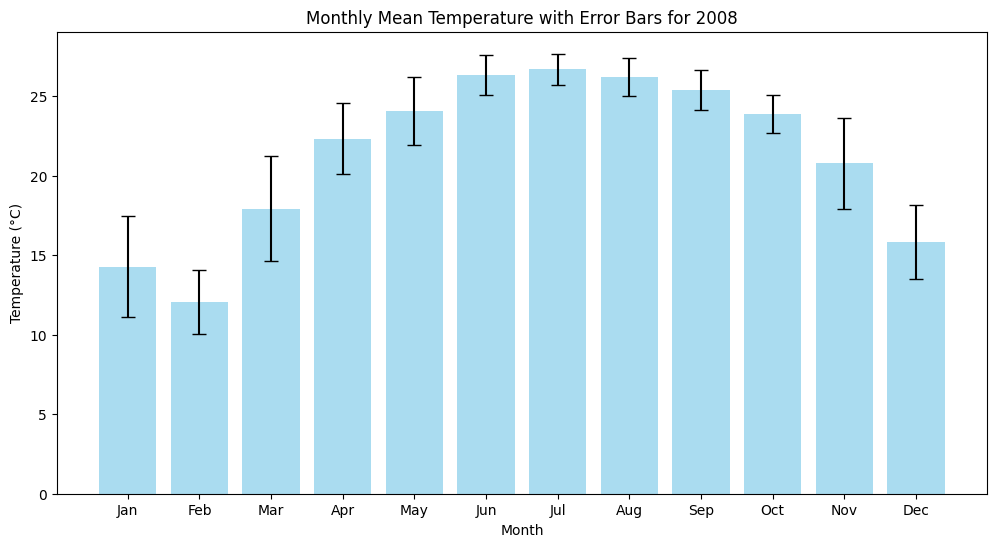

In [61]:
monthly_mean = df2.groupby('Month')['Temperature'].mean()
monthly_stdev = df2.groupby('Month')['Temperature'].std()

months = range(1, 13)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
plt.bar(months, monthly_mean, yerr=monthly_stdev, capsize=5, color='skyblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Mean Temperature with Error Bars for 2008')
plt.xticks(months, month_labels)

plt.show()

Task 5


Task 6

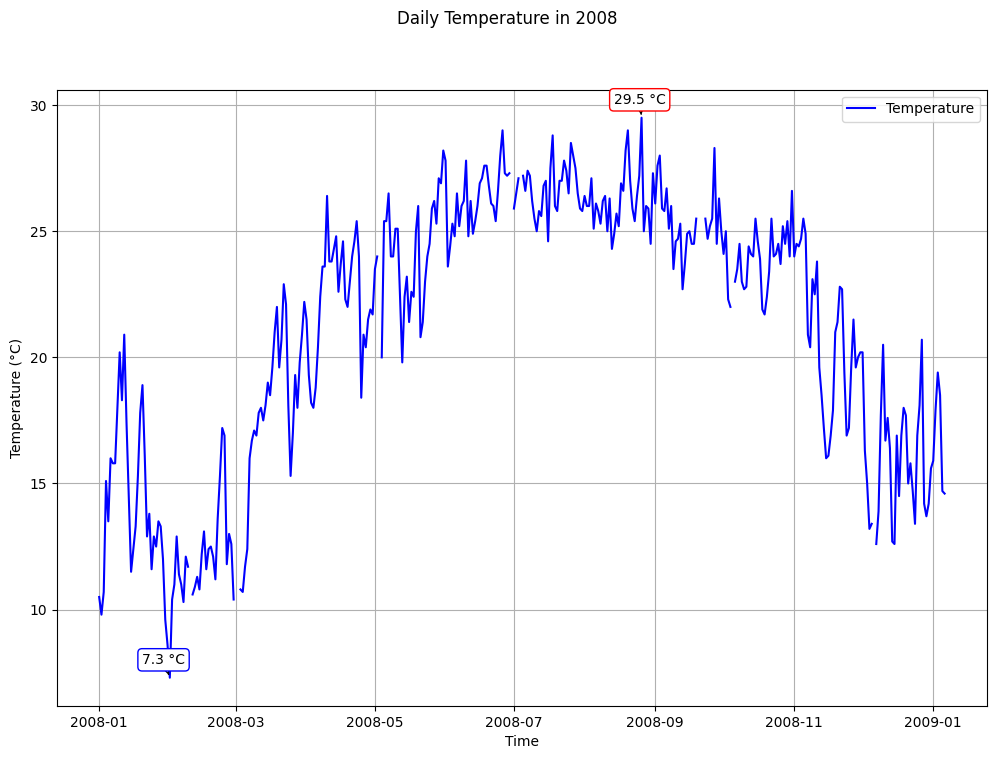

In [64]:
from datetime import datetime, timedelta
path = "/home/dang032003/data_visualization/homework/hw1/Homework_sampledata1.txt"

daily_temp = []

with open(path, 'r') as file:
    for line in file:
        values = [float(val) if val != '-99.0' else np.nan for val in line.split()]
        daily_temp.append(values)

daily_temp = daily_temp[1:]
daily_temp = [row[1:] for row in daily_temp]

temperature_array = np.array(daily_temp)
daily_temp = temperature_array.flatten(order='F')

start_date = datetime(2008, 1, 1)
end_date = datetime(2008, 12, 31)
date_range = [start_date + timedelta(days=i) for i in range(len(daily_temp))]
date_range_truncated = date_range[:len(daily_temp)]
daily_temp_truncated = daily_temp[:len(date_range)]

#Plotting
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.plot(date_range_truncated, daily_temp_truncated, linestyle='-', color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.legend(['Temperature'])

#Highest temp
highest_temp_index = np.nanargmax(daily_temp)
annotate_highest_temp = daily_temp_truncated[highest_temp_index]
ax.annotate(f'{annotate_highest_temp:.1f} °C', 
            xy=(date_range[highest_temp_index], annotate_highest_temp),
            xytext=(-20, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'),
            arrowprops=dict(arrowstyle='->'))

#Lowest temp
lowest_temp_index = np.nanargmin(daily_temp)
annotate_lowest_temp = daily_temp_truncated[lowest_temp_index]
ax.annotate(f'{annotate_lowest_temp:.1f} °C', 
            xy=(date_range[lowest_temp_index], annotate_lowest_temp),
            xytext=(-20, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white'),
            arrowprops=dict(arrowstyle='->'))



plt.suptitle(f"Daily Temperature in 2008")
plt.grid(True)

plt.show()


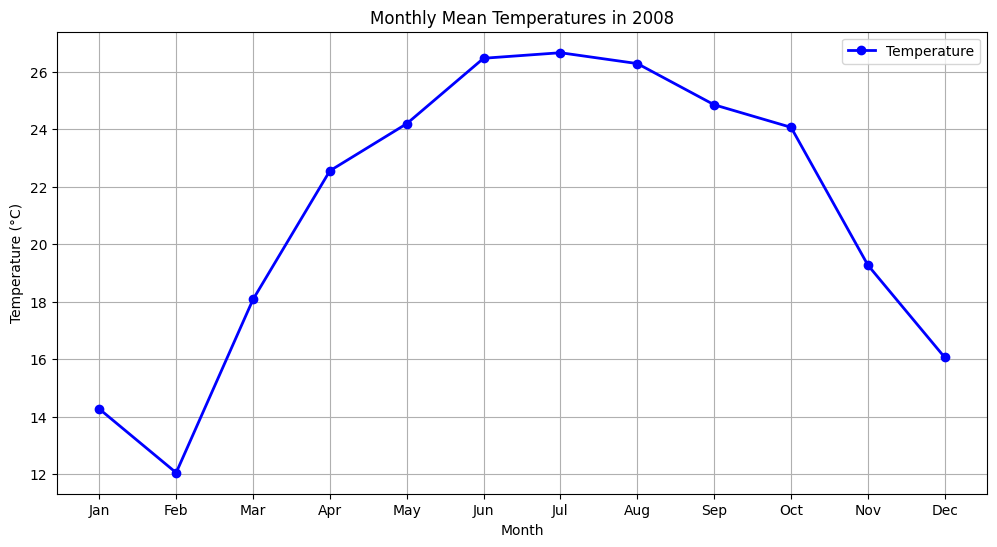

In [108]:
from datetime import datetime, timedelta
path = "/home/dang032003/data_visualization/homework/hw1/Homework_sampledata1.txt"

daily_temp = []

with open(path, 'r') as file:
    for line in file:
        values = [float(val) if val != '-99.0' else np.nan for val in line.split()]
        daily_temp.append(values)

daily_temp = daily_temp[1:]
daily_temp = [row[1:] for row in daily_temp]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_means = []

for month_index in range(12):
    monthly_sum = 0.0
    monthly_count = 0
    
    for daily_temps in daily_temp:
        if not np.isnan(daily_temps[month_index]):
            monthly_sum += daily_temps[month_index]
            monthly_count += 1
    
    if monthly_count > 0:
        monthly_mean = monthly_sum / monthly_count
    else:
        monthly_mean = np.nan

    monthly_means.append(monthly_mean)

plt.figure(figsize=(12, 6))
plt.plot(months, monthly_means, color='b', linestyle='-', marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Mean Temperatures in 2008')
plt.legend(['Temperature'])
plt.grid(True)
plt.show()

